In [73]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 


In [ ]:
data_path = "./Data_Providers/"
df_providers_class_content = pd.read_csv(data_path + 'content_overview_new_202509.csv')
df_providers_class_service = pd.read_csv(data_path + 'service_overview_new_202509.csv')

In [75]:
df_providers_class_content = df_providers_class_content.dropna()
df_providers_class_service = df_providers_class_service.dropna()

In [76]:
print(df_providers_class_content.describe()), print(df_providers_class_service.describe())

       map_matching    exclusive    redundant
count   6449.000000  6449.000000  6449.000000
mean       0.903245     0.502858     0.056660
std        0.253115     0.459575     0.118425
min        0.000000     0.000000     0.000000
25%        0.957475     0.000000     0.000000
50%        0.986478     0.611602     0.000000
75%        0.998533     0.989916     0.062284
max        1.000000     1.000000     1.000000
       availability     freshness  contribution    usability        frc_0  \
count   6754.000000   6754.000000   6754.000000  6754.000000  6754.000000   
mean       0.904962    624.297064      0.050942     0.297199     0.086793   
std        0.265942   2056.097340      0.124200     0.326596     0.208883   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.995035      0.570000      0.000000     0.000000     0.000000   
50%        0.999716      5.040000      0.000035     0.226451     0.000000   
75%        1.000000     92.170000      0.029912

(None, None)

In [77]:
merged_df = pd.merge(
    df_providers_class_content,
    df_providers_class_service,
    on='feed',
    how='inner'
)
merged_df.describe()

,map_matching,exclusive,redundant,availability,freshness,contribution,usability,frc_0,frc_1,frc_2,...,frc_7,weather,security_alert,activity,accidents,road_condition,roadworks,closures,hazards,traffic_restriction
count,587466.000000,587466.000000,587466.000000,587466.000000,587466.000000,587466.000000,587466.000000,587466.000000,587466.000000,587466.000000,...,587466.000000,587466.000000,587466.000000,587466.000000,587466.000000,587466.000000,587466.000000,587466.000000,587466.000000,587466.000000
mean,0.875076,0.247102,0.022630,0.863467,1052.960592,0.017109,0.152397,0.051467,0.026912,0.042371,...,0.040602,0.000170,0.003156,0.001862,0.039670,0.003490,0.126857,0.084746,0.015147,0.011776
std,0.307601,0.412986,0.076847,0.312501,2831.485425,0.066761,0.281408,0.172106,0.091128,0.128716,...,0.129391,0.003550,0.048776,0.027679,0.167607,0.040875,0.290817,0.230987,0.090015,0.082295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.968257,0.000000,0.000000,0.990452,1.060000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.992793,0.000000,0.000000,0.999545,17.630000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.563361,0.000000,1.000000,216.940000,0.000017,0.221855,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,19476.850000,0.976036,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.167801,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
df_complete = merged_df.drop(columns= ['instance','server_x','server_y', 'country_code_x','country_code_y','date_y','date_x','issues','security_alert','activity','frc_0', 'frc_1','frc_2','frc_3', 'frc_4','frc_5','frc_6','frc_7'])

In [79]:
df_complete.head(10)

,feed,map_matching,exclusive,redundant,availability,freshness,contribution,usability,weather,accidents,road_condition,roadworks,closures,hazards,traffic_restriction
0,ANWB_Netherlands,0.994946,0.519985,0.181549,1.000000,1.03,0.015911,0.384977,0.0,0.071425,0.000628,0.085295,0.825352,0.017156,0.000145
1,ANWB_Netherlands,0.994946,0.519985,0.181549,1.000000,1.03,0.018056,0.354566,0.0,0.055208,0.000343,0.155704,0.775124,0.013506,0.000114
2,ANWB_Netherlands,0.994946,0.519985,0.181549,0.999979,0.90,0.023397,0.448627,0.0,0.033055,0.000000,0.000192,0.000000,0.000817,0.888104
3,ANWB_Netherlands,0.994946,0.519985,0.181549,0.999979,0.90,0.026098,0.442703,0.0,0.086339,0.000000,0.000159,0.000000,0.000675,0.849542
4,ANWB_Netherlands,0.994946,0.519985,0.181549,1.000000,0.98,0.017199,0.444689,0.0,0.050064,0.000430,0.007617,0.932950,0.008631,0.000307
5,ANWB_Netherlands,0.994946,0.519985,0.181549,1.000000,0.98,0.018799,0.394421,0.0,0.042633,0.000372,0.022380,0.926933,0.007416,0.000266
6,ANWB_Netherlands,0.994946,0.519985,0.181549,0.999940,1.00,0.012999,0.580640,0.0,0.058534,0.000821,0.107925,0.815398,0.016954,0.000368
7,ANWB_Netherlands,0.994946,0.519985,0.181549,0.999940,1.00,0.013688,0.499056,0.0,0.054684,0.000553,0.112584,0.815997,0.015839,0.000343
8,ANWB_Netherlands,0.994946,0.519985,0.181549,1.000000,0.89,0.009364,0.513567,0.0,0.079584,0.001104,0.169761,0.722927,0.025724,0.000900
9,ANWB_Netherlands,0.994946,0.519985,0.181549,1.000000,0.89,0.009825,0.447647,0.0,0.076379,0.001055,0.143968,0.753204,0.024535,0.000860


In [80]:
df_complete['freshness'].describe()

count    587466.000000
mean       1052.960592
std        2831.485425
min           0.000000
25%           1.060000
50%          17.630000
75%         216.940000
max       19476.850000
Name: freshness, dtype: float64

In [81]:
df_complete['freshness'] = (df_complete['freshness'] - df_complete['freshness'].min()) / (df_complete['freshness'].max() - df_complete['freshness'].min())


In [82]:
df_complete

,feed,map_matching,exclusive,redundant,availability,freshness,contribution,usability,weather,accidents,road_condition,roadworks,closures,hazards,traffic_restriction
0,ANWB_Netherlands,0.994946,0.519985,0.181549,1.000000,0.000053,0.015911,0.384977,0.0,0.071425,0.000628,0.085295,0.825352,0.017156,0.000145
1,ANWB_Netherlands,0.994946,0.519985,0.181549,1.000000,0.000053,0.018056,0.354566,0.0,0.055208,0.000343,0.155704,0.775124,0.013506,0.000114
2,ANWB_Netherlands,0.994946,0.519985,0.181549,0.999979,0.000046,0.023397,0.448627,0.0,0.033055,0.000000,0.000192,0.000000,0.000817,0.888104
3,ANWB_Netherlands,0.994946,0.519985,0.181549,0.999979,0.000046,0.026098,0.442703,0.0,0.086339,0.000000,0.000159,0.000000,0.000675,0.849542
4,ANWB_Netherlands,0.994946,0.519985,0.181549,1.000000,0.000050,0.017199,0.444689,0.0,0.050064,0.000430,0.007617,0.932950,0.008631,0.000307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587461,winnipeg_can,0.986774,0.993116,0.093602,0.879325,0.035226,0.055965,0.456221,0.0,0.000000,0.000000,0.475781,0.524219,0.000000,0.000000
587462,winnipeg_can,0.986774,0.993116,0.093602,0.906573,0.036392,0.067141,0.405271,0.0,0.000000,0.000000,0.611055,0.388945,0.000000,0.000000
587463,winnipeg_can,0.986774,0.993116,0.093602,0.906573,0.036392,0.071589,0.438254,0.0,0.000000,0.000000,0.650501,0.349499,0.000000,0.000000
587464,winnipeg_can,0.986774,0.993116,0.093602,0.875425,0.036465,0.079805,0.404985,0.0,0.000000,0.000000,0.571987,0.428013,0.000000,0.000000


In [ ]:
#scaler = StandardScaler()
#df_scaled = df_complete.copy()
#df_scaled[cols_to_scale] = scaler.fit_transform(df_complete[cols_to_scale])

In [83]:
#from sklearn.preprocessing import RobustScaler
df = df_complete[df_complete.columns[1:]]

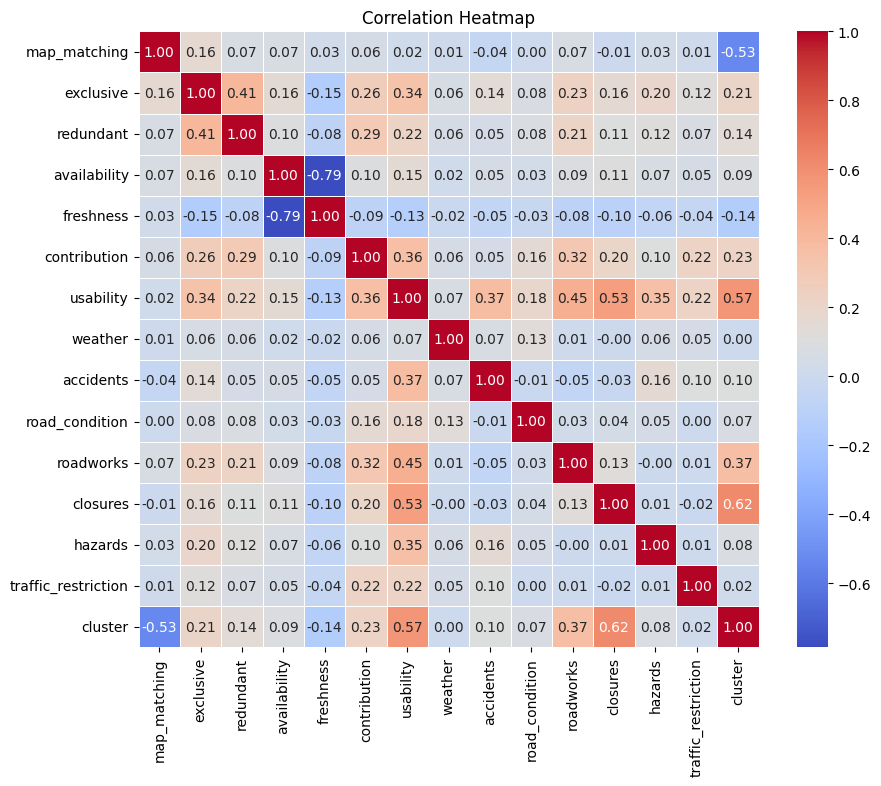

In [115]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

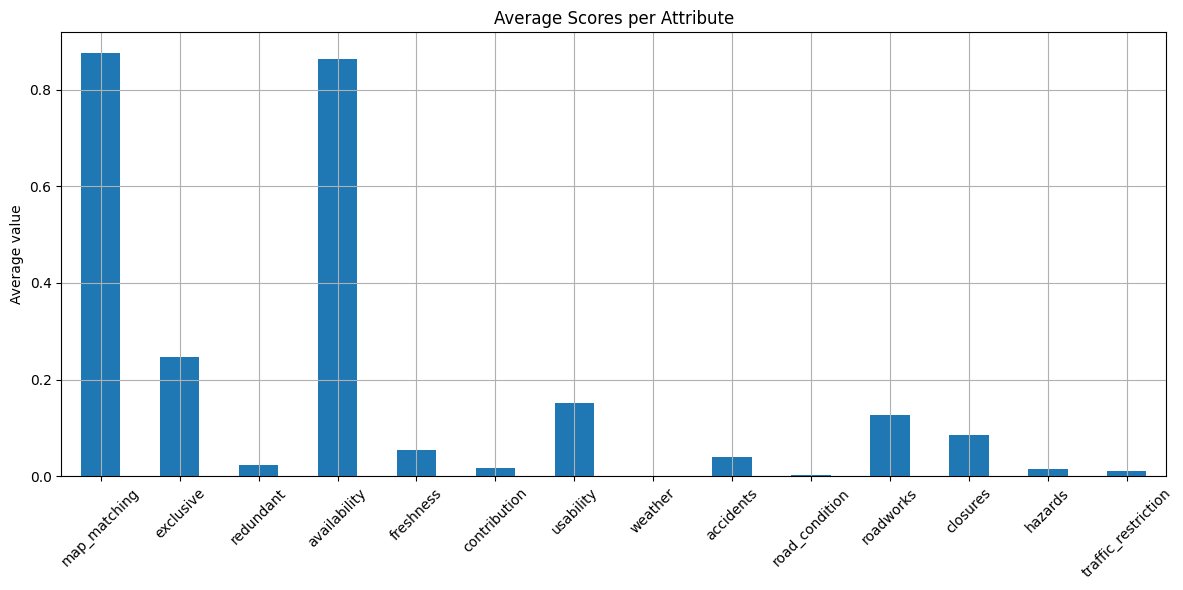

In [114]:
cols = [
    'map_matching', 'exclusive', 'redundant', 'availability', 'freshness',
    'contribution', 'usability', 'weather', 'accidents', 'road_condition',
    'roadworks', 'closures', 'hazards', 'traffic_restriction'
]

# Optionally: normalize or scale if on different ranges
df_subset = df[cols]

# Plot the average value for each column
df_subset.mean().plot(kind='bar', figsize=(12, 6))
plt.ylabel('Average value')
plt.title('Average Scores per Attribute')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df)


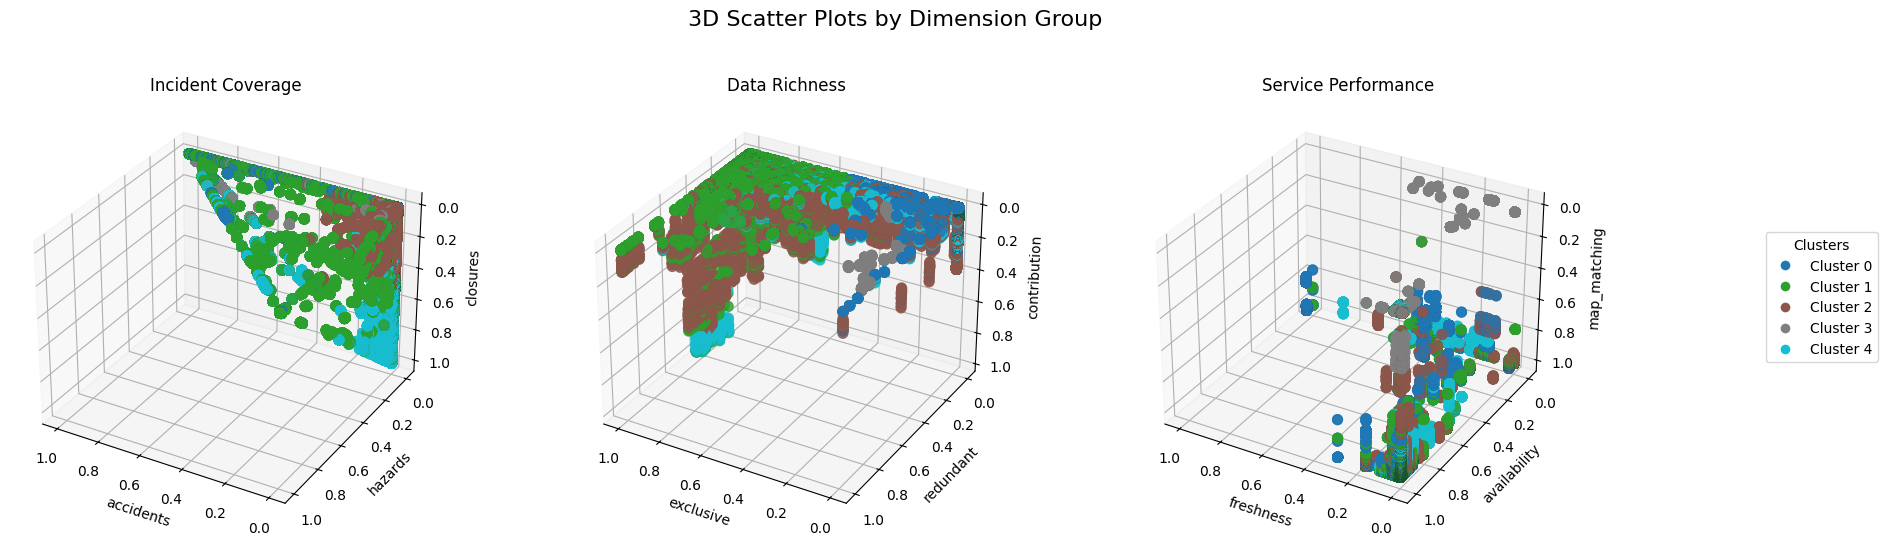

In [112]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D  # Needed even if not directly used

fig = plt.figure(figsize=(18, 6))  # Wider layout for side-by-side

# Define your triplets and titles
plot_configs = [
    ('accidents', 'hazards', 'closures', 'Incident Coverage'),
    ('exclusive', 'redundant', 'contribution', 'Data Richness'),
    ('freshness', 'availability', 'map_matching', 'Service Performance')
]

# Loop to create subplots
for idx, (x_col, y_col, z_col, title) in enumerate(plot_configs, start=1):
    ax = fig.add_subplot(1, 3, idx, projection='3d')
    
    scatter = ax.scatter(
        df[x_col],
        df[y_col],
        df[z_col],
        c=df['cluster'],
        cmap='tab10',
        s=50,
        alpha=0.8
    )
    
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel(z_col)

    # Apply consistent inversion logic if needed (edit per axis logic)
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.invert_zaxis()
    
    ax.set_title(title)

# Shared legend (outside of plot area)
handles = [
    Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
           markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=8)
    for i in sorted(df['cluster'].unique())
]

fig.legend(handles=handles, title='Clusters', loc='center right', bbox_to_anchor=(1.05, 0.5))
fig.suptitle('3D Scatter Plots by Dimension Group', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.88, 1])  # shrink plot area slightly more
fig.subplots_adjust(wspace=0.3)        # increase horizontal space between subplots

plt.show()


In [96]:
from sklearn.metrics import silhouette_score

score_pca = silhouette_score(df, df['cluster'])

In [97]:
score_pca

0.6644284137855946

In [90]:
cluster_summary = df.groupby('cluster')[['map_matching', 'redundant', 'freshness','exclusive', 'availability', 'contribution', 'usability']].agg(['mean', 'min', 'max', 'count'])

In [91]:
mean_cols = cluster_summary.loc[:, pd.IndexSlice[:, 'mean']]

# Rename columns for easier access (optional)
mean_cols.columns = mean_cols.columns.droplevel(1)  # drop second level 'mean'

# Now calculate average of the three feature means for each cluster
cluster_summary['average_mean'] = mean_cols.mean(axis=1)



cluster_variance = df.groupby('cluster')[['map_matching', 'redundant', 'exclusive', 'availability', 'freshness', 'contribution', 'usability']].var()
cluster_summary['variance_score'] = cluster_variance.mean(axis=1)

# Extract individual mean values
map_matching_mean = cluster_summary[('map_matching', 'mean')]
exclusive_mean = cluster_summary[('exclusive', 'mean')]
redundant_mean = cluster_summary[('redundant', 'mean')]
availability_mean = cluster_summary[('availability', 'mean')]
freshness_mean = cluster_summary[('freshness', 'mean')]
contribution_mean = cluster_summary[('contribution', 'mean')]
usability_mean = cluster_summary[('usability', 'mean')]
# Apply the custom scoring formula
cluster_summary['custom_score'] = map_matching_mean + exclusive_mean + availability_mean + freshness_mean + contribution_mean + usability_mean - redundant_mean

# Rank clusters by custom score
cluster_summary['custom_rank'] = cluster_summary['custom_score'].rank(ascending=False)


In [93]:
cluster_summary

map_matching                             redundant                 \
                mean       min       max   count      mean  min       max   
cluster                                                                     
0           0.988484  0.592584  1.000000  311023  0.001407  0.0  0.983821   
1           0.963444  0.000000  1.000000   99008  0.064423  0.0  1.000000   
2           0.965660  0.000000  1.000000   70639  0.069084  0.0  1.000000   
3           0.001641  0.000000  0.327967   59739  0.003583  0.0  0.791167   
4           0.912427  0.000000  1.000000   47057  0.029420  0.0  0.983821   

                freshness       ... contribution         usability            \
          count      mean  min  ...          max   count      mean       min   
cluster                         ...                                            
0        311023  0.078206  0.0  ...     0.254743  311023  0.007902  0.000000   
1         99008  0.020441  0.0  ...     0.976036   99008  0.206286  0.000000   
2         70639  0.028862  0.0  ...     0.867462   70639  0.445291  0.000486   
3         59739  0.043712  0.0  ...     0.195692   59739  0.082471  0.000000   
4         47057  0.016190  0.0  ...     0.973971   47057  0.643148  0.000727   

                     average_mean variance_score custom_score custom_rank  
         max   count                                                       
cluster                                                                    
0        1.0  311023     0.272158       0.022966     1.902291         4.0  
1        1.0   99008     0.453587       0.028064     3.046265         1.0  
2        1.0   70639     0.432666       0.053984     2.890493         2.0  
3        1.0   59739     0.132462       0.025821     0.920070         5.0  
4        1.0   47057     0.409549       0.045907     2.808000         3.0  

[5 rows x 32 columns]

In [94]:
# Sort clusters by average_mean descending (best quality first)
cluster_summary_mean = cluster_summary.sort_values('custom_rank', ascending=True)

# Define grades to assign by rank
grades = ['A+', 'A', 'B', 'C', 'D']

# Assign grades based on rank position
cluster_summary_mean['grade'] = pd.Series(grades[:len(cluster_summary_mean)], index=cluster_summary_mean.index)
cluster_summary_mean[['custom_score', 'grade']]

,custom_score,grade
,,
cluster,,
1,3.046265,A+
2,2.890493,A
4,2.808000,B
0,1.902291,C
3,0.920070,D


In [95]:
# Sort clusters by variability ascending (best quality first)
cluster_summary_var = cluster_summary.sort_values('variance_score', ascending=True)

# Define grades to assign by rank
grades = ['A+', 'A', 'B', 'C', 'D']

# Assign grades based on rank position
cluster_summary_var['grade'] = pd.Series(grades[:len(cluster_summary_var)], index=cluster_summary_var.index)
cluster_summary_var[['variance_score', 'grade']]

,variance_score,grade
,,
cluster,,
0,0.022966,A+
3,0.025821,A
1,0.028064,B
4,0.045907,C
2,0.053984,D


map_matching                             redundant                 \
                mean       min       max   count      mean  min       max   
cluster                                                                     
0           0.988484  0.592584  1.000000  311023  0.001407  0.0  0.983821   
3           0.001641  0.000000  0.327967   59739  0.003583  0.0  0.791167   
1           0.963444  0.000000  1.000000   99008  0.064423  0.0  1.000000   
4           0.912427  0.000000  1.000000   47057  0.029420  0.0  0.983821   
2           0.965660  0.000000  1.000000   70639  0.069084  0.0  1.000000   

                freshness       ... contribution usability                 \
          count      mean  min  ...        count      mean       min  max   
cluster                         ...                                         
0        311023  0.078206  0.0  ...       311023  0.007902  0.000000  1.0   
3         59739  0.043712  0.0  ...        59739  0.082471  0.000000  1.0   
1         99008  0.020441  0.0  ...        99008  0.206286  0.000000  1.0   
4         47057  0.016190  0.0  ...        47057  0.643148  0.000727  1.0   
2         70639  0.028862  0.0  ...        70639  0.445291  0.000486  1.0   

                average_mean variance_score custom_score custom_rank grade  
          count                                                             
cluster                                                                     
0        311023     0.272158       0.022966     1.902291         4.0    A+  
3         59739     0.132462       0.025821     0.920070         5.0     A  
1         99008     0.453587       0.028064     3.046265         1.0     B  
4         47057     0.409549       0.045907     2.808000         3.0     C  
2         70639     0.432666       0.053984     2.890493         2.0     D  

[5 rows x 33 columns]